# Task 4: Title Extractor 
Extract titles from names and analyze their impact!


In [ ]:
import pandas as pd
df = pd.read_csv('data/train.csv')
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    # 'Sex': Must be changed to a number (eg: male=0, female=1), or use pd.get_dummies
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


*Load and preprocess data as in previous tasks. This ensures the title analysis is based on clean data.*

In [ ]:
# 1. Ekstrak Title
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
common_titles = ['Mr', 'Mrs', 'Miss', 'Master']
df['Title'] = df['Title'].apply(lambda x: x if x in common_titles else 'Other')


*Extract the 'Title' from each passenger's name, and group rare titles as 'Other'.*

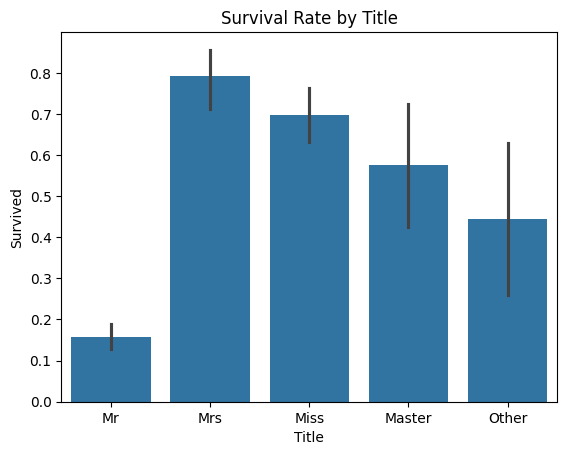

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Title', y='Survived', data=df)
plt.title("Survival Rate by Title")
plt.show()
# Train a model with the new feature

*Visualize survival rates by title to reveal patterns (e.g., Mrs, Miss, Master).*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = pd.concat([df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']],
               pd.get_dummies(df['Title'])], axis=1)
    # Merge straight numeric columns (Pclass, Sex, Age, Fare, FamilySize)
    # Merge dummy variables resulting from pd.get_dummies(df['Title']) for each unique value of Title (Mr, Mrs, Miss, Master, Other, etc.).
    # 'FamilySize': Make sure it has been created before in code extractor
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy with Title:", accuracy_score(y_test, y_pred))
# The accuracy with the Title feature is printed above.

Accuracy with Title: 0.7877094972067039


*Evaluate model accuracy after including title as a feature. Does this new feature add value?*

**Task 4 Answers**

**Which titles had the highest survival rates?**  
Mrs had the highest survival rate, followed by Miss and Master. As seen in the bar chart, married women (Mrs) and unmarried women (Miss) had much better chances of survival compared to men (Mr).

**Did adding titles improve your model's accuracy?**  
Adding the Title feature to the model gave an accuracy of 0.7877. This is slightly lower than some other feature sets in this experiment, but still significant. Titles add extra context about age, gender, and social status, which can help the model pick up hidden patterns.

**What does "Master" mean, and why might it be important?**  
“Master” was a formal title used for young boys (usually under 13 years old). It's important because Titanic’s evacuation procedures and social norms prioritized children, so this title directly signaled a higher chance of survival compared to adult men.